# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score


In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"/Users/myronmoskalyk/Library/CloudStorage/OneDrive-UniversityofToronto/Lectures/Applied Machine Learning/L8/mhealth.csv")
df.head(10)
# Mobile Health data: n=9,

df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [4]:
np.shape(df)

(999999, 14)

# Train/Test Split

In [6]:
# For the train DataFrame
train_subjects = ['subject1', 'subject2', 'subject3', 'subject4', 'subject5', 'subject6']
train = df[df['subject'].isin(train_subjects)]

# For the test DataFrame
test_subjects = ['subject7', 'subject8', 'subject9']
test = df[df['subject'].isin(test_subjects)]


In [7]:
# Convert the train subject column to float
train['subject'] = train['subject'].str.replace('subject', '').astype(float)
print(train)

            alx      aly      alz       glx       gly      glz     arx  \
0       2.18490  -9.6967  0.63077  0.103900 -0.840530 -0.68762 -8.6499   
1       2.38760  -9.5080  0.68389  0.085343 -0.838650 -0.68369 -8.6275   
2       2.40860  -9.5674  0.68113  0.085343 -0.838650 -0.68369 -8.5055   
3       2.18140  -9.4301  0.55031  0.085343 -0.838650 -0.68369 -8.6279   
4       2.41730  -9.3889  0.71098  0.085343 -0.838650 -0.68369 -8.7008   
...         ...      ...      ...       ...       ...      ...     ...   
748796 -0.70263 -10.7370 -0.38760 -0.833020 -0.106940 -1.46170 -7.7709   
748797  0.15446 -10.5470 -0.20287 -0.833020 -0.106940 -1.46170 -7.6457   
748798 -0.31526 -10.5170 -0.20608 -0.833020 -0.106940 -1.46170 -6.8737   
748799  0.22728 -10.1550  0.32785 -0.833020 -0.106940 -1.46170 -7.7798   
748800 -0.47293 -10.3510  0.51938 -0.920220  0.056285 -1.38900 -8.7026   

           ary       arz      grx     gry       grz  Activity  subject  
0      -4.5781  0.187760 -0.44902 -1.0

/var/folders/nk/2v28ppd55c5g570q_lr7fnh80000gn/T/ipykernel_62844/3466237327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['subject'] = train['subject'].str.replace('subject', '').astype(float)


In [8]:
# Convert the test subject column to float
test['subject'] = test['subject'].str.replace('subject', '').astype(float)
print(test)

            alx     aly     alz      glx      gly       glz     arx     ary  \
748801  2.34480 -9.6597  1.3530  0.78108 -0.52158 -0.049116 -7.0806 -6.6875   
748802  2.08880 -9.4906  1.4318  0.77922 -0.52533 -0.039293 -6.8389 -6.5352   
748803  2.13860 -9.4919  1.3072  0.77922 -0.52533 -0.039293 -6.6737 -6.6865   
748804  2.21270 -9.6292  1.4365  0.77922 -0.52533 -0.039293 -6.7865 -6.4962   
748805  2.21950 -9.6426  1.0817  0.77922 -0.52533 -0.039293 -6.6627 -6.4775   
...         ...     ...     ...      ...      ...       ...     ...     ...   
999994  0.75593 -8.9661  4.3822 -0.46568 -0.54597  0.616900 -6.6138 -2.5801   
999995  0.76348 -8.8288  4.2537 -0.46568 -0.54597  0.616900 -6.4246 -2.5633   
999996  0.76376 -8.9685  4.1425 -0.48423 -0.54221  0.630650 -6.8242 -2.5435   
999997  0.80362 -8.8894  4.1261 -0.48423 -0.54221  0.630650 -6.6379 -2.5223   
999998  0.72300 -8.9084  4.2076 -0.48423 -0.54221  0.630650 -6.5171 -2.4827   

           arz      grx      gry      grz  Activity

/var/folders/nk/2v28ppd55c5g570q_lr7fnh80000gn/T/ipykernel_62844/3362149598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['subject'] = test['subject'].str.replace('subject', '').astype(float)


# EDA

In [10]:
print(" Dimensions of train set: " + str(np.shape(train)))
print(" Dimensions of test set: " + str(np.shape(test)))

 Dimensions of train set: (748801, 14)
 Dimensions of test set: (251198, 14)


In [11]:
train["Activity"].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

<Axes: >

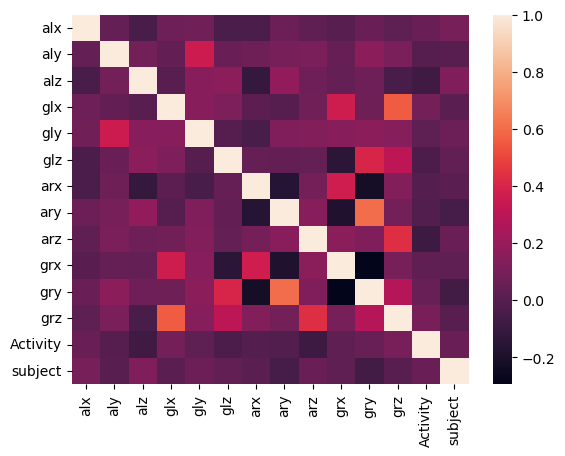

In [12]:
corr=train.corr()
round(corr,2)
sns.heatmap(corr)

In [13]:
train.columns

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')

In [14]:
activity_labels = {
    0: 'Nothing',
    1: 'Standing still (1 min)',
    2: 'Sitting and relaxing (1 min)',
    3: 'Lying down (1 min)',
    4: 'Walking (1 min)',
    5: 'Climbing stairs (1 min)',
    6: 'Waist bends forward (x20)',
    7: 'Frontal elevation of arms (x20)',
    8: 'Knees bending (crouching) (x20)',
    9: 'Cycling (1 min)',
    10: 'Jogging (1 min)',
    11: 'Running (1 min)',
    12: 'Jump front & back (x20)'
}

train_labelled = train.copy()
train_labelled['Activity'] = train_labelled['Activity'].map(activity_labels)


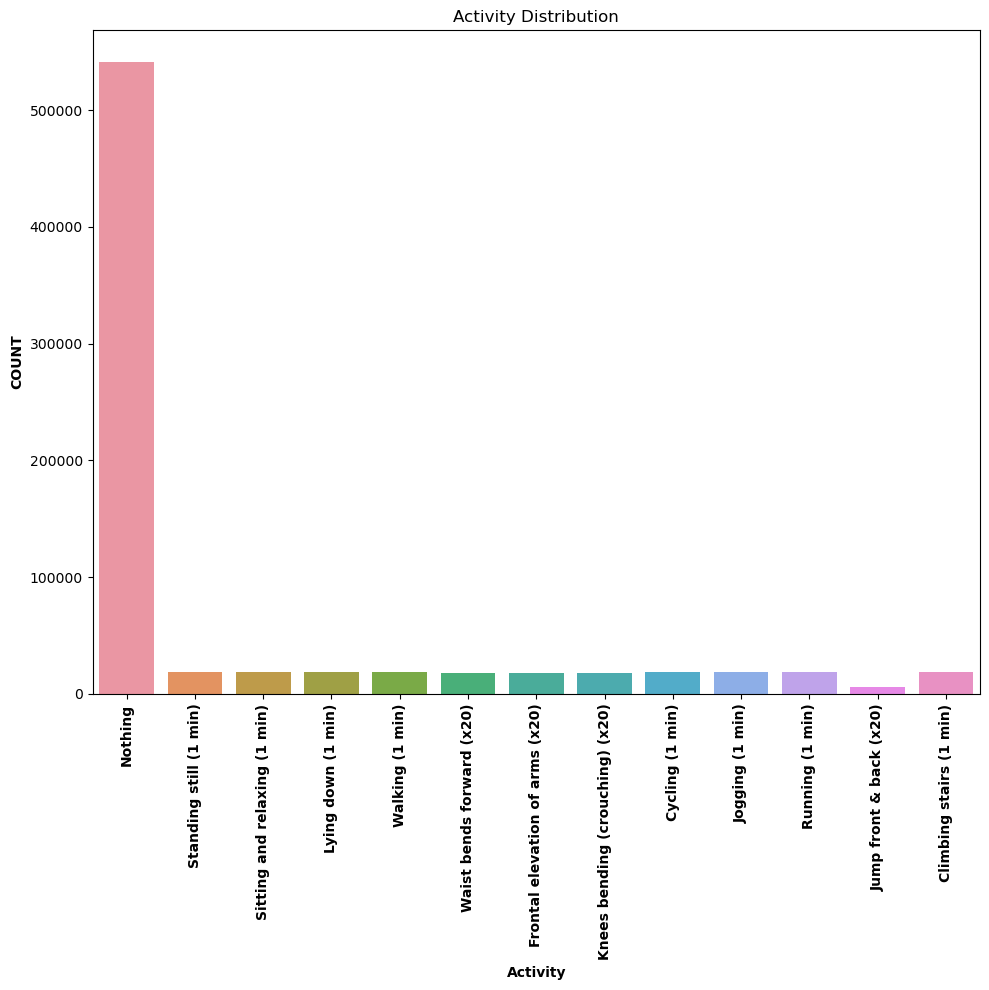

In [15]:
# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Race Distribution with updated color palette
plt.figure(figsize=(10, 10))
sns.countplot(x='Activity', data=train_labelled)
plt.title('Activity Distribution')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=90, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
activity_dist = plt.gcf()
plt.show()

In [16]:
def colrange(df):
    for column in df.columns[:-1]:  # Exclude the last column since it is labelled
        min_val = df[column].min()
        max_val = df[column].max()
        col_range = max_val - min_val
        print("Range for " + str(column) + ": " + str(min_val) + ", " + str(max_val))
        print(col_range)

# Example usage
colrange(train)


Range for alx: -22.118, 20.054
42.172
Range for aly: -19.619, 21.161
40.78
Range for alz: -19.373, 25.015
44.388000000000005
Range for glx: -2.1466, 1.8701
4.0167
Range for gly: -7.7899, 2.0113
9.8012
Range for glz: -2.5678, 2.7701
5.337899999999999
Range for arx: -22.361, 19.864
42.225
Range for ary: -18.972, 22.191
41.163
Range for arz: -18.238, 25.741
43.979
Range for grx: -8.3392, 3.3196
11.6588
Range for gry: -3.5708, 1.5565
5.1273
Range for grz: -2.6897, 2.75
5.4397
Range for Activity: 0, 12
12


# Normalize

In [18]:
# Setup
traincol = train.columns.tolist()
testcol = test.columns.tolist()
scaler = StandardScaler()

# Separate subject and Activity
subject_train = train['subject']
activity_train = train['Activity']
subject_test = test['subject']
activity_test = test['Activity']

# Drop the 'subject' and 'Activity' columns to scale the rest
train_to_scale = train.drop(['subject', 'Activity'], axis=1)
test_to_scale = test.drop(['subject', 'Activity'], axis=1)

# Fitting the scaler to the training data and transforming both training and test data
train_sc = scaler.fit_transform(train_to_scale)
test_sc = scaler.transform(test_to_scale)

# Convert the NumPy arrays to DataFrames
train_sc = pd.DataFrame(train_sc, columns=[col for col in traincol if col not in ['subject', 'Activity']])
test_sc = pd.DataFrame(test_sc, columns=[col for col in testcol if col not in ['subject', 'Activity']])

# Add the 'subject' and 'Activity' columns back
train_sc['subject'] = subject_train.reset_index(drop=True)
train_sc['Activity'] = activity_train.reset_index(drop=True)
test_sc['subject'] = subject_test.reset_index(drop=True)
test_sc['Activity'] = activity_test.reset_index(drop=True)


In [19]:
train_sc.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,subject,Activity
0,0.199165,-0.017148,0.309088,0.376638,-0.589487,-0.962208,-1.041599,0.160844,-0.668889,-0.207277,-0.981516,-0.404945,1.0,0
1,0.250775,0.027716,0.318869,0.338268,-0.584307,-0.955039,-1.036926,0.205402,-0.710325,-0.207277,-0.981516,-0.404945,1.0,0
2,0.256122,0.013594,0.318361,0.338268,-0.584307,-0.955039,-1.011477,0.212750,-0.646688,-0.207277,-0.981516,-0.404945,1.0,0
3,0.198274,0.046237,0.294272,0.338268,-0.584307,-0.955039,-1.037010,0.206005,-0.623518,-0.222250,-0.977888,-0.420281,1.0,0
4,0.258337,0.056032,0.323858,0.338268,-0.584307,-0.955039,-1.052217,0.235400,-0.613480,-0.222250,-0.977888,-0.420281,1.0,0


In [20]:
test_sc.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,subject,Activity
0,0.239878,-0.008351,0.442080,1.776820,0.289256,0.202496,-0.714235,-0.203034,-0.148631,-0.589230,0.526046,0.998246,7.0,0
1,0.174697,0.031853,0.456590,1.772974,0.278924,0.220415,-0.663816,-0.176762,-0.091512,-0.589230,0.526046,0.998246,7.0,0
2,0.187377,0.031544,0.433646,1.772974,0.278924,0.220415,-0.629354,-0.202862,-0.122330,-0.589230,0.526046,0.998246,7.0,0
3,0.206244,-0.001099,0.457455,1.772974,0.278924,0.220415,-0.652885,-0.170035,-0.114683,-0.570514,0.511864,1.021247,7.0,0
4,0.207975,-0.004285,0.392122,1.772974,0.278924,0.220415,-0.627059,-0.166809,-0.148631,-0.570514,0.511864,1.021247,7.0,0


# Sequencing


In [22]:


sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]  
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_sc, sequence_length=100)
X_test, y_test = create_sequences(test_sc, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7488, 100, 12), (7488,), (2511, 100, 12), (2511,))

In [23]:
from keras.preprocessing.sequence import pad_sequences

# Padding sequences
max_length = max(len(s) for s in X_train)
# We can also go with max_length
padded_sequences = pad_sequences(X_train, maxlen=max_length, padding='post', dtype='float')

padded_sequences.shape


2023-11-21 05:19:16.147358: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(7488, 100, 12)

In [24]:
# Padding sequences for the test set
padded_sequences_test = pad_sequences(X_test, maxlen=max_length, padding='post', dtype='float')

padded_sequences_test.shape

(2511, 100, 12)

# Balancing


In [26]:
from collections import Counter

# Calculate class distribution
class_distribution = Counter(y_train)

# Print the class distribution
print(class_distribution)


Counter({0: 5409, 1: 186, 10: 186, 2: 185, 3: 185, 4: 185, 11: 185, 5: 185, 9: 184, 7: 180, 8: 180, 6: 177, 12: 61})


### Downsample Act0

In [28]:
from sklearn.utils import resample

counts = [class_distribution.get(i, 0) for i in range(max(class_distribution.keys()) + 1)]
target_count = np.median(counts[1:])  # Using the median count of non-zero activities

# Separate sequences for "Activity 0"
act_0_seq = padded_sequences[y_train == 0]
other_act_seq = padded_sequences[y_train != 0]

# Also separate the labels
act_0_labels = y_train[y_train == 0]
other_act_labels = y_train[y_train != 0]

# Perform undersampling for "Activity 0"
act_0_seq_bal = resample(act_0_seq, replace=False, n_samples=int(target_count), random_state=42)

act_0_labels_bal = np.zeros(int(target_count))

# Combine the undersampled data with the other activities
padded_sequences_bal = np.concatenate((act_0_seq_bal, other_act_seq))
y_train_bal = np.concatenate((act_0_labels_bal, other_act_labels))

# Check the new distribution
unique_balanced, counts_balanced = np.unique(y_train_bal, return_counts=True)
new_class_distribution = dict(zip(unique_balanced, counts_balanced))
print(new_class_distribution)

# Validate the shapes
print(padded_sequences_bal.shape, y_train_bal.shape)

{0.0: 185, 1.0: 186, 2.0: 185, 3.0: 185, 4.0: 185, 5.0: 185, 6.0: 177, 7.0: 180, 8.0: 180, 9.0: 184, 10.0: 186, 11.0: 185, 12.0: 61}
(2264, 100, 12) (2264,)


### Oversample Act12

In [30]:
"""# Oversampling the minority class (Activity 12)
act_12_seq = padded_sequences_bal[y_train_bal == 12]
act_12_labels = y_train_bal[y_train_bal == 12]

# Target count for oversampling is 1.5 times the median
oversample_target_count = int(target_count * 1.5)

# If the current count is less than the target count, perform oversampling
if len(act_12_seq) < oversample_target_count:
    act_12_seq_oversampled = resample(act_12_seq,
                                      replace=True,
                                      n_samples=oversample_target_count - len(act_12_seq),
                                      random_state=42)
    act_12_labels_oversampled = np.full(oversample_target_count - len(act_12_seq), 12)

    # Add the oversampled data back to the training set
    X_train_bal = np.concatenate((X_train_bal, act_12_seq_oversampled))
    y_train_bal = np.concatenate((y_train_bal, act_12_labels_oversampled))
    """

'# Oversampling the minority class (Activity 12)\nact_12_seq = padded_sequences_bal[y_train_bal == 12]\nact_12_labels = y_train_bal[y_train_bal == 12]\n\n# Target count for oversampling is 1.5 times the median\noversample_target_count = int(target_count * 1.5)\n\n# If the current count is less than the target count, perform oversampling\nif len(act_12_seq) < oversample_target_count:\n    act_12_seq_oversampled = resample(act_12_seq,\n                                      replace=True,\n                                      n_samples=oversample_target_count - len(act_12_seq),\n                                      random_state=42)\n    act_12_labels_oversampled = np.full(oversample_target_count - len(act_12_seq), 12)\n\n    # Add the oversampled data back to the training set\n    X_train_bal = np.concatenate((X_train_bal, act_12_seq_oversampled))\n    y_train_bal = np.concatenate((y_train_bal, act_12_labels_oversampled))\n    '

In [31]:
# Separate sequences for "Activity 12"
act_12_seq = padded_sequences_bal[y_train_bal == 12]
act_12_labels = y_train_bal[y_train_bal == 12]

# Target count for oversampling is the median
oversample_target_count = int(np.median(counts[1:]))

# If the current count is less than the target count, perform oversampling
if len(act_12_seq) < oversample_target_count:
    act_12_seq_oversampled = resample(act_12_seq, replace=True, n_samples=oversample_target_count - len(act_12_seq), random_state=42)
    act_12_labels_oversampled = np.full(oversample_target_count - len(act_12_seq), 12)

    # Add the oversampled data back to the training set
    padded_sequences_bal = np.concatenate((padded_sequences_bal, act_12_seq_oversampled))
    y_train_bal = np.concatenate((y_train_bal, act_12_labels_oversampled))

# Check the new distribution
unique_balanced, counts_balanced = np.unique(y_train_bal, return_counts=True)
new_class_distribution = dict(zip(unique_balanced, counts_balanced))
print(new_class_distribution)

# Validate the shapes
print(padded_sequences_bal.shape, y_train_bal.shape)

{0.0: 185, 1.0: 186, 2.0: 185, 3.0: 185, 4.0: 185, 5.0: 185, 6.0: 177, 7.0: 180, 8.0: 180, 9.0: 184, 10.0: 186, 11.0: 185, 12.0: 185}
(2388, 100, 12) (2388,)


In [32]:
"""# GOOD RUN
import torch as t
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

# Hyperparameters
input_size = 12  # Number of features in each timestep
hidden_size = 256  # Number of hidden units in RNN
num_classes = len(np.unique(y_train_bal))  # Number of unique classes
epochs = 2000
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.4)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.8)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 8 == 0:
        learning_rate *= 0.8  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        X = X.view(X.shape[0], -1, input_size)  # Reshape for LSTM if needed
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    fc_layer1.eval()
    fc_layer2.eval()


    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()
    """

"# GOOD RUN\nimport torch as t\nfrom torch import nn\nfrom torch.optim import Adam\nfrom torch.utils.data import DataLoader, TensorDataset\n\n# Hyperparameters\ninput_size = 12  # Number of features in each timestep\nhidden_size = 256  # Number of hidden units in RNN\nnum_classes = len(np.unique(y_train_bal))  # Number of unique classes\nepochs = 2000\nlearning_rate = 0.001\nbatch_size = 512\nlanda = 0.001  # Regularization term (lambda)\n\n# Data preparation\ntrain_dataset = TensorDataset(t.tensor(X_train_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))\ntrain_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)\n\ntest_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))\ntest_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)\n\n# RNN layers and additional fully connected layer\nrnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)\ndropout1 = nn.Dropout(0.4)  # Add dropout b

In [33]:
""" 

#tanh instead of relu

import torch as t
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

# Hyperparameters
input_size = 12  # Number of features in each timestep
hidden_size = 128  # Number of hidden units in RNN
num_classes = len(np.unique(y_train_bal))  # Number of unique classes
epochs = 1000
learning_rate = 0.001
batch_size = 32
landa = 0.0001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.1)  # Add dropout between RNN layers
rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.1)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer


# Dropout layer
dropout_fc = nn.Dropout(0.4)  # Add dropout between fully connected layers

# Activation function
relu = nn.Tanh()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate, weight_decay=landa)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
best_val_loss = float('inf')
best_train_loss = float('inf')
patience = 30
trigger_times = 0

# Training loop
for epoch in range(epochs):
    if epoch % 80 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()


    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total
        
        # Validation loss for early stopping
        val_loss_list = []
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = rnn_layer2(out)[0] 
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            loss = loss_fn(out, Y)
            val_loss_list.append(loss.item())
        val_loss = sum(val_loss_list) / len(val_loss_list)

        # Early Stopping based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
        
        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

     # Calculate and append the average loss for the epoch
    train_loss = sum(per_epoch_loss_list) / len(per_epoch_loss_list)
    
    train_loss_list.append(train_loss)
        
    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()
    """

Epoch 0/1000 ---> Train Accuracy: 50.41876046901172%, Validation Accuracy: 8.920748705694942%
Epoch 1/1000 ---> Train Accuracy: 64.19597989949749%, Validation Accuracy: 8.641975308641975%
Epoch 2/1000 ---> Train Accuracy: 74.32998324958123%, Validation Accuracy: 12.982875348466747%
Epoch 3/1000 ---> Train Accuracy: 82.66331658291458%, Validation Accuracy: 13.42094782954998%
Epoch 4/1000 ---> Train Accuracy: 78.30820770519263%, Validation Accuracy: 17.921146953405017%
Epoch 5/1000 ---> Train Accuracy: 77.68006700167504%, Validation Accuracy: 17.363600159299082%
Epoch 6/1000 ---> Train Accuracy: 85.72026800670017%, Validation Accuracy: 21.02747909199522%
Epoch 7/1000 ---> Train Accuracy: 87.31155778894473%, Validation Accuracy: 22.14257268020709%
Epoch 8/1000 ---> Train Accuracy: 82.03517587939699%, Validation Accuracy: 25.965750696933494%
Epoch 9/1000 ---> Train Accuracy: 87.43718592964824%, Validation Accuracy: 25.965750696933494%
Epoch 10/1000 ---> Train Accuracy: 78.72696817420436%, 

In [34]:
# This one obtains 65% but turn off patience


import torch as t
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

# Hyperparameters
input_size = 12  # Number of features in each timestep
hidden_size = 256  # Number of hidden units in RNN
num_classes = len(np.unique(y_train_bal))  # Number of unique classes
epochs = 200
learning_rate = 0.001
batch_size = 32
landa = 0.0001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.1)  # Add dropout between RNN layers
rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.1)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer


# Dropout layer
dropout_fc = nn.Dropout(0.4)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate, weight_decay=landa)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
best_val_loss = float('inf')
best_train_loss = float('inf')
patience = 25
trigger_times = 0

# Training loop
for epoch in range(epochs):
    if epoch % 20 == 0:
        learning_rate *= 0.8  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()


    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total
        
        # Validation loss for early stopping
        val_loss_list = []
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = rnn_layer2(out)[0] 
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            loss = loss_fn(out, Y)
            val_loss_list.append(loss.item())
        val_loss = sum(val_loss_list) / len(val_loss_list)

        # Early Stopping based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
        
        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

     # Calculate and append the average loss for the epoch
    train_loss = sum(per_epoch_loss_list) / len(per_epoch_loss_list)
    
    train_loss_list.append(train_loss)
        
    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


"\nimport torch as t\nfrom torch import nn\nfrom torch.optim import Adam\nfrom torch.utils.data import DataLoader, TensorDataset\n\n# Hyperparameters\ninput_size = 12  # Number of features in each timestep\nhidden_size = 256  # Number of hidden units in RNN\nnum_classes = len(np.unique(y_train_bal))  # Number of unique classes\nepochs = 200\nlearning_rate = 0.001\nbatch_size = 32\nlanda = 0.0001  # Regularization term (lambda)\n\n# Data preparation\ntrain_dataset = TensorDataset(t.tensor(padded_sequences_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))\ntrain_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)\n\ntest_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))\ntest_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)\n\n# RNN layers and additional fully connected layer\nrnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)\ndropout1 = nn.Dropout(0.1)  # 

The below code uses a random search to optimize hyperparams. To make it computationally feasible, we made the RNN dropout params equal and did not adjust lambda or sequence size.

In [36]:
"""
import torch as t
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm  # Import tqdm for progress bars
import numpy as np
import random

# Hyperparameters
input_size = 12  # Number of features in each timestep
hidden_size = 256  # Number of hidden units in RNN
num_classes = len(np.unique(y_train_bal))  # Number of unique classes
epochs = 10
initial_learning_rate = 0.001
batch_size = 128
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Activation function
relu = nn.ReLU()

# Define hyperparameter space for random search
hyperparameter_space = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128, 256],
    'dropout_rate_rnn': [0.1, 0.2, 0.3, 0.4, 0.5],
    'dropout_rate_fc': [0.1, 0.2, 0.3, 0.4, 0.5],
}

# Function to train and evaluate model with given hyperparameters
def train_and_evaluate_model(hyperparams):
    # Recreate data loaders with new batch size
    train_data_loader = DataLoader(train_dataset, batch_size=hyperparams['batch_size'], shuffle=True)
    test_data_loader = DataLoader(test_dataset, batch_size=hyperparams['batch_size'], shuffle=False)

    # RNN layers and additional fully connected layer with hyperparameter-specified dropout rates
    rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
    dropout1 = nn.Dropout(hyperparams['dropout_rate_rnn'])
    rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
    dropout2 = nn.Dropout(hyperparams['dropout_rate_rnn'])
    fc_layer1 = nn.Linear(hidden_size, hidden_size)
    dropout_fc = nn.Dropout(hyperparams['dropout_rate_fc'])
    fc_layer2 = nn.Linear(hidden_size, num_classes)

    # Optimizer with hyperparameter-specified learning rate
    optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=hyperparams['learning_rate'], weight_decay=landa)

    # Learning rate scheduler
    learning_rate_scheduler = t.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8)

    # Training loop
    for epoch in range(epochs):
        rnn_layer1.train()
        rnn_layer2.train()
        fc_layer1.train()
        fc_layer2.train()

        train_progress_bar = tqdm(train_data_loader, desc=f"Epoch {epoch+1}/{epochs} - Training")
        for X, Y in train_progress_bar:
            # Forward pass through layers
            out, _ = rnn_layer1(X)
            out = dropout1(out)
            out, _ = rnn_layer2(out)
            out = dropout2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)
            out = fc_layer2(out)

            # Regularization
            loss = loss_fn(out, Y)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_progress_bar.set_postfix(loss=loss.item())

        # Step the learning rate scheduler
        learning_rate_scheduler.step()

        # Evaluation on training and validation data
        rnn_layer1.eval()
        rnn_layer2.eval()
        fc_layer1.eval()
        fc_layer2.eval()

        validation_progress_bar = tqdm(test_data_loader, desc=f"Epoch {epoch+1}/{epochs} - Validation")
        with t.no_grad():
            # Training data accuracy
            train_correct, train_total = 0, 0
            for X, Y in train_data_loader:
                out, _ = rnn_layer1(X)
                out = dropout1(out)
                out, _ = rnn_layer2(out)
                out = dropout2(out)
                out = out[:, -1, :]
                out = relu(fc_layer1(out))
                out = dropout_fc(out)
                out = fc_layer2(out)
                _, predicted = t.max(out.data, 1)
                train_total += Y.size(0)
                train_correct += (predicted == Y).sum().item()
            train_accuracy = 100 * train_correct / train_total

            # Validation data accuracy
            validation_correct, validation_total = 0, 0
            for X, Y in validation_progress_bar:
                out, _ = rnn_layer1(X)
                out = dropout1(out)
                out, _ = rnn_layer2(out)
                out = dropout2(out)
                out = out[:, -1, :]
                out = relu(fc_layer1(out))
                out = dropout_fc(out)
                out = fc_layer2(out)
                _, predicted = t.max(out.data, 1)
                validation_total += Y.size(0)
                validation_correct += (predicted == Y).sum().item()
            validation_accuracy = 100 * validation_correct / validation_total

    return validation_accuracy

# Random Search
num_iterations = 10  # Number of iterations for random search
best_accuracy = 0
best_hyperparams = None

for _ in range(num_iterations):
    # Randomly select hyperparameters
    hyperparams = {k: random.choice(v) for k, v in hyperparameter_space.items()}

    # Train and evaluate the model with these hyperparameters
    accuracy = train_and_evaluate_model(hyperparams)

    # Update the best hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparams = hyperparams

# Print the best hyperparameters
print(f"Best hyperparameters: {best_hyperparams}")
"""

'\nimport torch as t\nfrom torch import nn\nfrom torch.optim import Adam\nfrom torch.utils.data import DataLoader, TensorDataset\nfrom tqdm import tqdm  # Import tqdm for progress bars\nimport numpy as np\nimport random\n\n# Hyperparameters\ninput_size = 12  # Number of features in each timestep\nhidden_size = 256  # Number of hidden units in RNN\nnum_classes = len(np.unique(y_train_bal))  # Number of unique classes\nepochs = 10\ninitial_learning_rate = 0.001\nbatch_size = 128\nlanda = 0.001  # Regularization term (lambda)\n\n# Data preparation\ntrain_dataset = TensorDataset(t.tensor(X_train_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))\ntrain_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)\n\ntest_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))\ntest_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)\n\n# Loss function\nloss_fn = nn.CrossEntropyLoss()\n\n# Activation functio

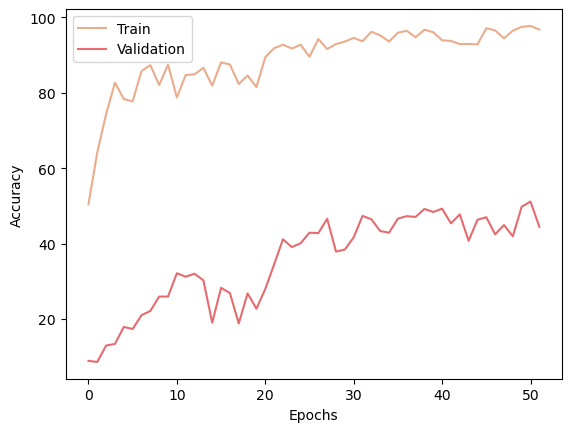

In [37]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()